In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

[]

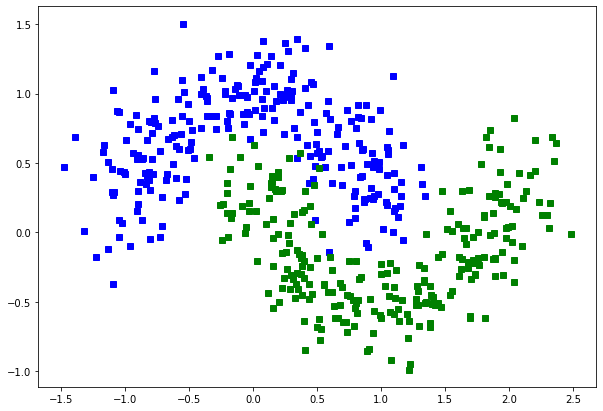

In [5]:
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

plt.figure(figsize=(10,7))
plt.plot(X[:,0][y == 0], X[:,1][y == 0], 'bs')
plt.plot(X[:,0][y == 1], X[:,1][y == 1], 'gs')
plt.plot()

# Extra Trees

In [6]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

In [12]:
clf_1 = RandomForestClassifier(n_estimators=15, max_depth=5, min_samples_split=2, random_state=42)
clf_2 = ExtraTreesClassifier(n_estimators=15, max_depth=5, min_samples_split=2, random_state=42)

clf_1.fit(X,y)
clf_2.fit(X,y)

ExtraTreesClassifier(max_depth=5, n_estimators=15, random_state=42)

In [13]:
from sklearn.metrics import accuracy_score
print('RF',accuracy_score(y, clf_1.predict(X)))
print('ET',accuracy_score(y, clf_2.predict(X)))

RF 0.978
ET 0.918


[]

<Figure size 720x360 with 0 Axes>

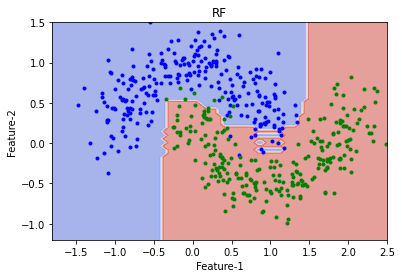

In [14]:
from sklearn.inspection import DecisionBoundaryDisplay

plt.figure(figsize=(10, 5))
disp = DecisionBoundaryDisplay.from_estimator(clf_1, 
                                              X,
                                              response_method="predict",
                                              xlabel='Feature-1', ylabel='Feature-2',
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)

plt.plot(X[:,0][y == 0], X[:,1][y == 0], 'b.')
plt.plot(X[:,0][y == 1], X[:,1][y == 1], 'g.')
plt.axis([-1.8,2.5,-1.2,1.5])
plt.title("RF")
plt.plot()

[]

<Figure size 720x360 with 0 Axes>

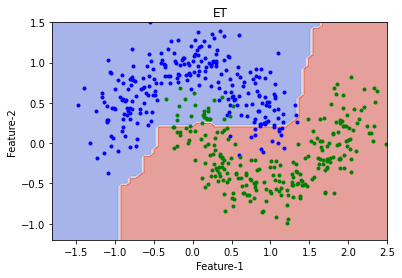

In [15]:
plt.figure(figsize=(10, 5))
disp = DecisionBoundaryDisplay.from_estimator(clf_2, 
                                              X,
                                              response_method="predict",
                                              xlabel='Feature-1', ylabel='Feature-2',
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)

plt.plot(X[:,0][y == 0], X[:,1][y == 0], 'b.')
plt.plot(X[:,0][y == 1], X[:,1][y == 1], 'g.')
plt.axis([-1.8,2.5,-1.2,1.5])
plt.title("ET")
plt.plot()

## Voting Classifier

In [17]:
from sklearn.datasets import make_moons
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

[]

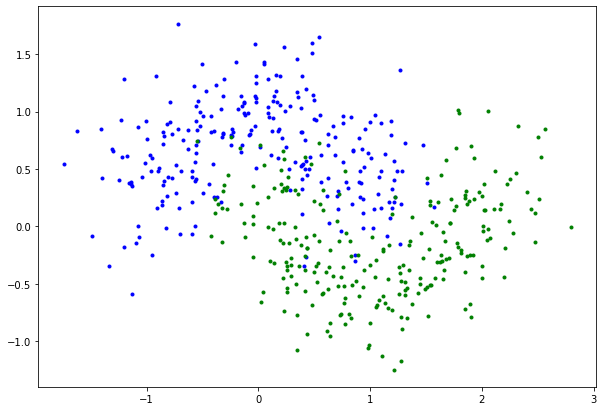

In [18]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

plt.figure(figsize=(10,7))
plt.plot(X[:,0][y == 0], X[:,1][y == 0], 'b.')
plt.plot(X[:,0][y == 1], X[:,1][y == 1], 'g.')
plt.plot()

In [19]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('dt', DecisionTreeClassifier(max_depth=3, random_state=42)),
        ('svc', SVC(random_state=42))
    ]
)

voting_clf.fit(X_train, y_train)

for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))

print('Voting classifier', voting_clf.score(X_test, y_test))

lr = 0.864
dt = 0.896
svc = 0.896
Voting classifier 0.904


In [20]:
voting_clf.predict(X_test[:1])

array([1])

In [21]:
[clf.predict(X_test[:1]) for clf in voting_clf.estimators_]

[array([1]), array([1]), array([0])]

### Soft Voting

In [22]:
voting_clf.voting = "soft"
voting_clf.named_estimators["svc"].probability = True

voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.912

In [23]:
[clf.predict_proba(X_test[:1]) for clf in voting_clf.estimators_]

[array([[0.49899618, 0.50100382]]),
 array([[0.33898305, 0.66101695]]),
 array([[0.56982947, 0.43017053]])]

In [24]:
voting_clf.predict_proba(X_test[:1])

array([[0.46926957, 0.53073043]])

In [25]:
voting_clf.predict(X_test[:1])

array([1])

[]

<Figure size 720x360 with 0 Axes>

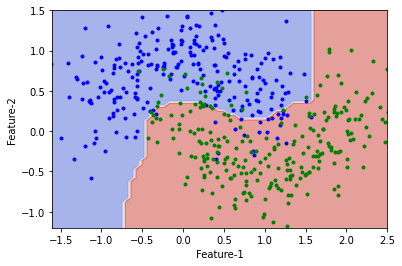

In [26]:
plt.figure(figsize=(10, 5))
disp = DecisionBoundaryDisplay.from_estimator(voting_clf, 
                                              X,
                                              response_method="predict",
                                              xlabel='Feature-1', ylabel='Feature-2',
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)

plt.plot(X[:,0][y == 0], X[:,1][y == 0], 'b.')
plt.plot(X[:,0][y == 1], X[:,1][y == 1], 'g.')
plt.axis([-1.6,2.5,-1.2,1.5])
plt.plot()